<p style="text-align: center;font-size:50px">
 Lab8: Transformada Wavelet
</p>

#### **Tabla de Contenido**

1. [Introducción](#introduccion)
2. [Objetivos](#objetivos)
3. [Materiales](#materiales)
4. [Procedimiento](#procedimiento)
5. [Resultados](#resultados)
6. [Discusión](#discusion)
7. [Conclusiones](#conclusiones)
8. [Bibliografía](#bibliografia)


## Introducción
<p style="text-align:justify;">
La Transformada Wavelet es una técnica matemática que permite analizar señales no estacionarias de forma local tanto en el tiempo como en la frecuencia, lo que la hace ideal para detectar eventos transitorios y cambios bruscos en las señales. A diferencia de la Transformada de Fourier, que proporciona información global de las frecuencias presentes en una señal sin indicar cuándo ocurren, la Transformada Wavelet permite descomponer la señal en componentes a diferentes escalas, ofreciendo un análisis multiresolución. Esto significa que se puede capturar información sobre cuándo y qué frecuencias están presentes en distintos momentos, lo cual es especialmente útil para analizar señales complejas donde las características varían en el tiempo [1].</p>


**Algunas aplicaciones de la transformada Wavelet son:**
- Analisis de señales biomédicas(ECG)
- Analisis de señales sísmicas
- Analisis de señales de sonido 
- Compresión y procesamiento de imágenes 
- Reconocimiento de patrones.


<p style="text-align:justify">
Para la Transformada Wavelet, se utiliza una función base que es llamada Wavelet madre o Wavelet original, la cual servirá como prototipo para realizar el análisis de la señal. Este proceso consiste en descomponer la señal en versiones trasladadas (en tiempo) y escaladas de la wavelet madre. [2] [3]
</p>

<!--<div style="text-align: center;">
    <img src="imagenes/1.png" alt="Descripción de la imagen" width="500">
</div>
-->
$$
\Large \psi_{a,b}(x) = \frac{1}{\sqrt{|a|}} w\left(\frac{x - b}{a}\right), \quad a,b \in \mathbb{R}, \quad a \neq 0
$$


<ul>
  <li><strong>a</strong> (escala): Controla si la wavelet está comprimida o estirada, lo que afecta la capacidad para detectar frecuencias altas o bajas.</li>
  <li><strong>b</strong> (traslación): Determina la posición en el tiempo (o espacio) donde la wavelet analiza la señal.</li>
  <li><em>w(x)</em>: Es la <em>wavelet madre</em>, la función original sin escalado ni traslación.</li>
  <li><em>&#968;<sub>a,b</sub>(x)</em>: Es la wavelet generada al escalar y trasladar la wavelet madre para adaptarse a la señal.</li>
</ul>



### **Tipos de Wavelet**

Existen diferentes tipos de transformadas wavelet que se pueden aplicar según el tipo de análisis que se desea realizar. A continuación, se mencionan las dos más importantes:

#### 1. Transformada Wavelet Continua (CoWT) [3]

La **Transformada Wavelet Continua** (CoWT) se utiliza para obtener una serie de coeficientes que indican qué tan parecida es la señal a analizar con la wavelet madre empleada. Esto se realiza a través de la convolución de la señal con versiones escaladas y trasladadas de la wavelet madre $ \psi(t) $.

El análisis continuo tiene la ventaja de que no se discretizan las señales ni las wavelets, lo que permite un análisis detallado de todas las escalas y posiciones. Sin embargo, esto puede implicar un mayor costo computacional debido a que se trabaja con un número infinito de escalas y tiempos.

La ecuación matemática que define la CoWT es:

$$
CoWT(b,a) = \frac{1}{\sqrt{|a|}} \int_{-\infty}^{\infty} x(t) \psi\left(\frac{t - b}{a}\right) dt
$$

Donde:
- $ \ x(t) $  es la señal a analizar.
- $ \psi(t) $ es la wavelet madre.
-  a  es el parámetro de escala.
-  b  es el parámetro de traslación.



#### 2. Transformada Wavelet Discreta (DWT)

Por otro lado, la **Transformada Wavelet Discreta** (DWT) discretiza tanto la señal como las wavelets. A diferencia de la CoWT, la DWT se realiza a partir de una selección específica de escalas y traslaciones, lo que permite reducir la cantidad de cálculos sin perder demasiada información de la señal. Es comúnmente utilizada en compresión de señales y procesamiento de imágenes.

La ecuación matemática de la DWT es:

$$
DWT(n,m) = \sum_{t} x(t) \psi_{n,m}(t)
$$

Donde:
- $ \psi_{n,m}(t) $  representa la wavelet madre con parámetros discretos de escala \( n \) y traslación \( m \).

#### Wavelets 1D y 2D

- **Wavelet 1D**: Se utiliza para analizar señales unidimensionales, como las series temporales o señales de audio. En este caso, la wavelet se aplica en una sola dimensión (el tiempo).
  
- **Wavelet 2D**: Se aplica para señales bidimensionales, como imágenes, donde se analizan dos dimensiones (normalmente espacio en lugar de tiempo). Esto permite un análisis en detalle tanto horizontal como vertical.

### **Tipos de Wavelet Madre**

<p style="text-align:justify">
Para la elección del tipo de wavelet dependerá del tipo de señal que se esté analizando y también del tipo de información que se desea obtener. Se pueden seguir dos criterios de selección para el tipo de wavelet:

El primero es buscar wavelets que se parezcan a la señal (en forma) y el segundo método es realizar pruebas con diferentes wavelets y seleccionar los que arrojan mejores resultados. [5]
</p>



##### **Algunas Wavelet Madre conocidas [4]**

1. **Daubechies (db):**

   **Características**: Las wavelets de Daubechies tienen soporte compacto y están diseñadas para tener el mayor número de momentos de desvanecimiento posible para un determinado ancho de ventana. Se utilizan ampliamente en la Transformada Wavelet Discreta (DWT) y continua.

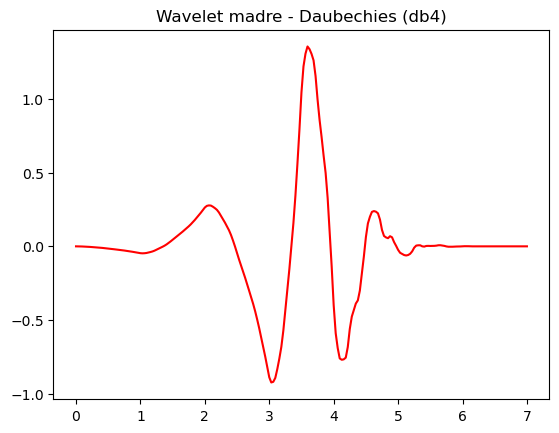

In [6]:


# Crear una wavelet madre Daubechies (db4)
wavelet = pywt.Wavelet('db4')

# Obtener los coeficientes de la wavelet madre y generar su representación
phi, psi, x = wavelet.wavefun(level=5)

# Graficar la wavelet madre (psi)
plt.plot(x, psi,"red")
plt.title('Wavelet madre - Daubechies (db4)')
plt.show()


2. **Biortogonales (bior):**

   **Características**: Las wavelets biortogonales permiten una reconstrucción exacta y simétrica, lo que no es posible con wavelets ortogonales excepto en la wavelet Haar. Tienen soporte compacto.

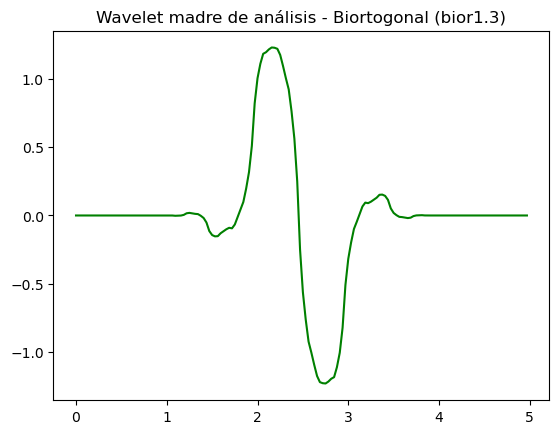

In [12]:
# Crear una wavelet madre biortogonal (por ejemplo, 'bior1.3')
wavelet = pywt.Wavelet('bior1.3')

# Obtener los coeficientes de la wavelet madre y generar su representación
phi_d, psi_d, phi_r, psi_r, x = wavelet.wavefun(level=5)

# Graficar la wavelet de análisis (psi_d)
plt.plot(x, psi_d,"g")
plt.title('Wavelet madre de análisis - Biortogonal (bior1.3)')
plt.show()


3. **Symlets (sym):**

   **Características**: Las wavelets Symlets son una versión más simétrica de las wavelets Daubechies, con menos asimetría y un número similar de momentos de desvanecimiento.

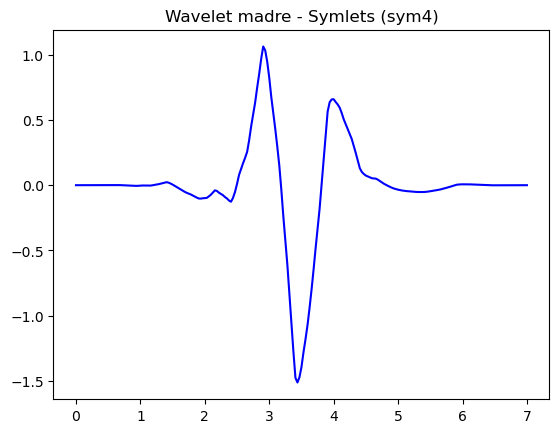

In [13]:
wavelet = pywt.Wavelet('sym4')

# Obtener los coeficientes de la wavelet madre y generar su representación
phi, psi, x = wavelet.wavefun(level=5)

# Graficar la wavelet madre (psi)
plt.plot(x, psi,"b")
plt.title('Wavelet madre - Symlets (sym4)')
plt.show()


4. **Morlet (morl):**

   **Características**: La wavelet de Morlet es una función sinusoidal modulada por una envolvente Gaussiana. Es muy útil en el análisis continuo debido a su buena localización en frecuencia.

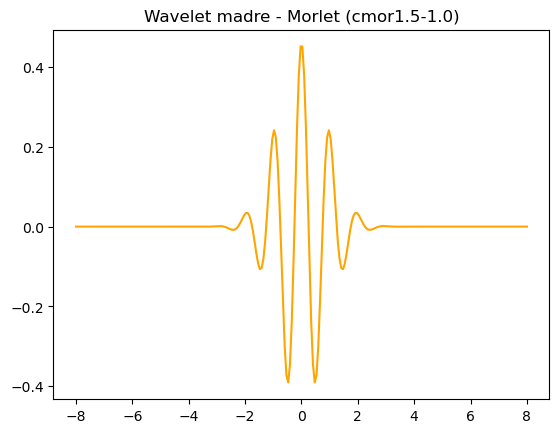

In [17]:
# Definir los parámetros de la wavelet Morlet
wavelet = pywt.ContinuousWavelet('cmor1.5-1.0')  # Esta es una Morlet compleja

# Crear el rango de valores para 'x'
x = np.linspace(-1, 1, num=1000)

# Obtener la wavelet madre
psi, x = wavelet.wavefun()

# Graficar la wavelet madre
plt.plot(x, psi.real,"orange")
plt.title('Wavelet madre - Morlet (cmor1.5-1.0)')
plt.show()


5. **Mexican Hat (mexh):**

   **Características**: También conocida como la onda sombrero mexicano, esta wavelet es la segunda derivada de una función Gaussiana. Tiene buena localización en el tiempo.

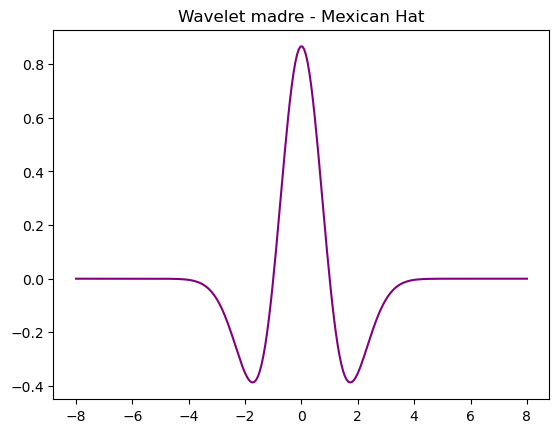

In [23]:
# Crear una wavelet madre Mexican Hat (Ricker wavelet)
wavelet = pywt.ContinuousWavelet('mexh')

# Obtener la representación de la wavelet madre
psi, x = wavelet.wavefun()

# Graficar la wavelet madre (Mexican Hat)
plt.plot(x, psi,"purple")
plt.title('Wavelet madre - Mexican Hat')
plt.show()

### **Caracteristicas de las Wavelets [3]**

Para que una funcion de analisis sea clasificada como Wavelet $\psi(t)$ , debe cumplir ciertos criterios.


1. **Energía finita**:  
   Para que una wavelet sea válida, debe tener energía finita. Esto se expresa matemáticamente como:

   $$
   E = \int_{-\infty}^{\infty} |\psi(t)|^2 dt < \infty
   $$

2. **Criterio de Admisibilidad**:  
   La función wavelet \( \psi(t) \) también debe cumplir con el criterio de la constante de admisibilidad \( C_\psi \), el cual se define como:

   $$
   C_\psi = \int_0^{\infty} \frac{|\hat{\psi}(f)|^2}{f} df < \infty
   $$

    Aquí, $\hat{\psi}(f)$ es la transformada de Fourier de la wavelet $\psi(t)$ y $f$ representa la frecuencia.



3. **Transformada de Fourier para Wavelets Complejas**:  
   En el caso de wavelets complejas, la transformada de Fourier \( \Psi(f) \) debe ser real y desvanecida para las frecuencias negativas.

 <a id="objetivos"></a>

## Objetivos
as

## Materiales
asd

## Procedimiento


## Resultados


## Discusión


## Conclusiones

## Bibliografía
[1] "Apuntes sobre Wavelets," Departamento de Ciencias y Tecnología de la Universidad Nacional del Centro de la Provincia de Buenos Aires, [Online]. Available: https://users.exa.unicen.edu.ar/catedras/escuelapav/cursos/wavelets/apunte.pdf. [Accessed: 21-Oct-2024].

[2] S. Kouro R. y R. Musalem M., "Tutorial introductorio a la Teoría de Wavelet," Universidad Técnica Federico Santa María, Valparaíso, Chile. [Online]. Available: http://www2.elo.utfsm.cl/~elo377/documentos/Wavelet.pdf. [Accessed: 21-Oct-2024].

[3] R. González G., "Capítulo 3: Revisión de la Teoría de Wavelets," Universidad de las Américas Puebla, Puebla, México. [Online]. Available: https://catarina.udlap.mx/u_dl_a/tales/documentos/mel/gonzalez_g_ra/capitulo3.pdf. [Accessed: 21-Oct-2024].

[4] E. Pinto Moreno, "Familias de Wavelets," Universidad Carlos III de Madrid, Madrid, España. [Online]. Available: https://e-archivo.uc3m.es/bitstream/10016/16582/1/PFC_Elena_Pinto_Moreno_Anexos.pdf. [Accessed: 21-Oct-2024].

[5] "Acervo para el Mejoramiento del Aprendizaje de Alumnos de Ingeniería, en Inteligencia Artificial," Grupo de Investigación en Sistemas Inteligentes, UNAM Cuautitlán, México. [Online]. Available: https://virtual.cuautitlan.unam.mx/intar/?page_id=1108. [Accessed: 21-Oct-2024].

In [5]:
import pywt
import numpy as np
import matplotlib.pyplot as plt